# Class Workbook

## In class activity

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
#import ISLP as islp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/2n/62kb2_1x78d6bpf42ntcmynh0000gn/T/ipykernel_51701/1791503323.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/opt/anaco

### Ames Housing data

Please take a look at the Ames Hoursing data.

In [2]:
ames_raw=pd.read_csv("ames_raw.csv")

### Questions

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [3]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [4]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Here are few rules:

- You are not allowed to use the test data.
- Try 3 of the regularization methods discussed in Ch6.
- You should use a resampling method that is most appropriate for choosing the hyper parameters.

Your code:

In [5]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

- For each of the models you've run, can you interpret which variable impacts the outcome the most?
Are the results consistent across different methods?

Your code:

In [6]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Try these methods with bootstrap, are the results consistent?

Your code:

In [7]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Based on all the models you've run, which result predicts the best?  Which one is most easy to understand?  Which method gives the most stable results?

Your code:

In [8]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### Best Subset

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

(a) Use the `normal()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

Your code:

In [9]:
# Set seed for reproducibility
np.random.seed(0)

# Generate predictor X and noise epsilon
n = 100
X = np.random.normal(loc=0, scale=1, size=n)  # mean=0, sd=1
epsilon = np.random.normal(loc=0, scale=1, size=n)  # mean=0, sd=1

(b) Generate a response vector $Y$ of length $n = 100$ according to the model $$\mathbf{y} = \boldsymbol{\beta}_0 + \beta_1X + \beta2X^2 + \beta_3X^3 + \epsilon$$, where $\beta_{0}$ , $\beta_{1}$, $\beta_{2}$, and $\beta_{3}$ are constants of your choice.

Your code:

In [36]:
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4

# Generate Y
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

(c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X$, $X^{2},\dots,X^{10}$. What is the best model obtained according to $C_p$ , BIC, and adjusted $R^2$ ? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

Your code:

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import statsmodels.api as sm

X_poly = np.vander(X, N=11, increasing=True)[:,1:]  # Exclude the column for X^0

df_poly = pd.DataFrame(X_poly, columns=[f'X^{i}' for i in range(1, 11)])
df_poly['Y'] = Y  # Add the response variable

def fit_model_and_calculate_criteria(features):
    # Fit model
    X = df_poly[list(features)]
    X = sm.add_constant(X)  # Adds a constant term to the model
    model = sm.OLS(df_poly['Y'], X).fit()
    
    # Calculate criteria
    rss = model.ssr
    n = len(df_poly)
    p = len(model.params) - 1  # Adjust for constant
    mse = rss / (n - p - 1)
    cp = (1/n) * (rss + 2 * p * mse)
    bic = model.bic
    adj_r_squared = model.rsquared_adj
    
    return (cp, bic, adj_r_squared, model)

results = []
for k in range(1, 11):  # Number of predictors in the model
    for combo in combinations(df_poly.columns[:-1], k):  # Exclude response variable Y
        criteria = fit_model_and_calculate_criteria(combo)
        results.append((combo, *criteria))

best_cp = min(results, key=lambda x: x[1])
best_bic = min(results, key=lambda x: x[2])
best_adj_r_squared = max(results, key=lambda x: x[3])

# Print the best models
print("Best model based on Cp:", best_cp[0])
print("Best model based on BIC:", best_bic[0])
print("Best model based on Adjusted R^2:", best_adj_r_squared[0])

# Coefficients of the best model (example for one criterion)
print("Coefficients of the best model based on Cp:", best_cp[-1].params)


Best model based on Cp: ('X^1', 'X^2', 'X^3', 'X^5')
Best model based on BIC: ('X^1', 'X^2', 'X^3')
Best model based on Adjusted R^2: ('X^1', 'X^2', 'X^3', 'X^4', 'X^7', 'X^9')
Coefficients of the best model based on Cp: const    1.177226
X^1      1.730710
X^2      2.884336
X^3      4.377513
X^5     -0.061077
dtype: float64


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

Your code:

In [43]:
features = set(df_poly.columns[:-1])  # All possible features excluding the response
selected_features_forward = []
remaining_features = list(features)
model_performance = []

while remaining_features:
    scores_with_candidates = []
    for candidate in remaining_features:
        current_features = selected_features_forward + [candidate]
        X = sm.add_constant(df_poly[current_features])  # Adds a constant term to the model
        model = sm.OLS(df_poly['Y'], X).fit()
        scores_with_candidates.append((model.aic, candidate))
    
    scores_with_candidates.sort()
    best_new_score, best_candidate = scores_with_candidates[0]
    
    # Break if no improvement
    if not model_performance or best_new_score < model_performance[-1][0]:
        selected_features_forward.append(best_candidate)
        remaining_features.remove(best_candidate)
        model_performance.append((best_new_score, selected_features_forward.copy()))
    else:
        break

selected_features_backward = list(features)
model_performance_backward = []

while selected_features_backward:
    scores_with_candidates = []
    for candidate in selected_features_backward:
        current_features = selected_features_backward.copy()
        current_features.remove(candidate)
        X = sm.add_constant(df_poly[current_features])  # Adds a constant term to the model
        model = sm.OLS(df_poly['Y'], X).fit()
        scores_with_candidates.append((model.aic, candidate))
    
    scores_with_candidates.sort(reverse=True)
    best_new_score, worst_candidate = scores_with_candidates[0]
    
    if not model_performance_backward or best_new_score < model_performance_backward[-1][0]:
        selected_features_backward.remove(worst_candidate)
        model_performance_backward.append((best_new_score, selected_features_backward.copy()))
    else:
        break

# Output the results
print("Forward Stepwise Selection Features:", selected_features_forward)
print("Backward Stepwise Selection Features:", selected_features_backward[-1][1])


Forward Stepwise Selection Features: ['X^3', 'X^2', 'X^1', 'X^5']
Backward Stepwise Selection Features: ^


Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Now fit a lasso model to the simulated data, again using $X$, $X^{2},\dots, X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

Your code:

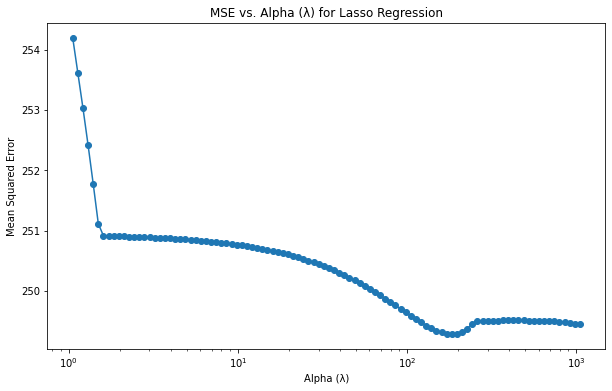

[ 0.         0.        -0.0001176]


In [47]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

X = np.random.normal(size=(100, 1))  # Example input feature, replace with your actual data

X_2 = X**2
X_10 = X**10

X_poly_specific = np.hstack((X, X_2, X_10))

lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

lasso_cv.fit(X_poly_specific, Y)  # Y should be your response vector

mse_path = lasso_cv.mse_path_.mean(axis=1)
alphas = lasso_cv.alphas_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, '-o')
plt.xlabel('Alpha (λ)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('MSE vs. Alpha (λ) for Lasso Regression')
plt.show()

# Coefficient estimates
coefficients = lasso_cv.coef_
print(coefficients)


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Now generate a response vector Y according to the model $$Y = \beta_{0} + \beta_{7}X^{7} + \epsilon,$$and perform best subset selection and the lasso. Discuss the results obtained.

Your code:

In [54]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

n_samples = 100
X = np.random.normal(size=n_samples).reshape(-1, 1)  # Reshape for consistency
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

beta_0 = 1
beta_7 = 5

epsilon = np.random.normal(size=n_samples)  # Match number of samples in X

Y_new = beta_0 + beta_7 * X_poly[:, 6] + epsilon  # Use the 7th degree term correctly

lasso_cv_new = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv_new.fit(X_poly, Y_new)  # Ensure Y is the correct shape

coefficients_new = lasso_cv_new.coef_

print("Coefficient estimates:", coefficients_new)


Coefficient estimates: [ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.86622327 -0.02026603]


Your answer:

~~~
Please write your answer in full sentences.


~~~

### College

In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [59]:
from ISLP import load_data
College = load_data("College").drop('Private', axis=1)
print(College.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB
None


(a) Split the data set into a training set and a test set.

Your code:

In [60]:
from sklearn.model_selection import train_test_split

# Assuming 'college_df' is your DataFrame containing the College dataset

# Splitting the dataset into features and target variable
# For example, if 'Apps' is the target variable
X = College.drop('Apps', axis=1)  # Features (all columns except 'Apps')
y = College['Apps']  # Target variable

# Split the data into training and testing sets
# Adjust the test_size to control the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test are now your datasets for training and testing


(b) Fit a linear model using least squares on the training set, and report the test error obtained.

Your code:

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE: {test_mse}")


Test MSE: 1442624.9143528002


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.


Your code:

In [62]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Define a range of lambda (alpha) values for RidgeCV to search

alphas = np.logspace(-6, 6, 13)

ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

ridge_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_test)

test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Test MSE for Ridge Regression: {test_mse_ridge}")
print(f"Best lambda (alpha) chosen by cross-validation: {ridge_cv.alpha_}")


Test MSE for Ridge Regression: 1443602.5421331476
Best lambda (alpha) chosen by cross-validation: 1000.0


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

Your code:

In [63]:
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
non_zero_coefficients = np.sum(lasso_cv.coef_ != 0)

print(f"Test MSE for Lasso Regression: {test_mse_lasso}")
print(f"Number of non-zero coefficients: {non_zero_coefficients}")


Test MSE for Lasso Regression: 1587020.0176529177
Number of non-zero coefficients: 7


Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [65]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('linear_regression', LinearRegression())
])

cross_val_scores = []

max_components = min(X_train.shape)

for n_components in range(1, max_components + 1):
    pipeline.set_params(pca__n_components=n_components)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cross_val_scores.append(np.mean(scores))

best_n_components = np.argmax(cross_val_scores) + 1  # +1 because index 0 corresponds to 1 component

pipeline.set_params(pca__n_components=best_n_components)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print(f"Best number of components: {best_n_components}")
print(f"Test MSE: {test_error}")


Best number of components: 16
Test MSE: 1442624.91435282


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [66]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

cv = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scores = []
components_range = range(1, min(X_train.shape[1], X_train.shape[0]) + 1)

for n_components in components_range:
    pls = PLSRegression(n_components=n_components)
    scores = cross_val_score(pls, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(scores))

best_n_components = np.argmax(mse_scores) + 1  # +1 because range starts at 1

pls_best = PLSRegression(n_components=best_n_components)
pls_best.fit(X_train, y_train)

y_pred_pls = pls_best.predict(X_test)
test_mse_pls = mean_squared_error(y_test, y_pred_pls)

print(f"Best number of components by CV: {best_n_components}")
print(f"Test MSE for PLS: {test_mse_pls}")


Best number of components by CV: 15
Test MSE for PLS: 1442731.7325720615


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?


Your code:

Your answer:

~~~
The small differences in MSE among PCR, PLS, Ridge, and Linear Regression indicate that each of these approaches has its merits, depending on the specific characteristics of the dataset and the modeling goals. For predictive performance, PCR slightly edges out as the most effective model among those tested. The choice between PCR, PLS, and Ridge should also consider factors like model interpretability, computational efficiency, and the specific use case's requirements. The relatively high lambda value for Ridge suggests a strong need for regularization, possibly due to multicollinearity among predictors.


PLS (Partial Least Squares) Regression:
Best number of components by CV: 15
Test MSE: 1,442,731.73

PCR (Principal Component Regression):
Best number of components: 16
Test MSE: 1,442,624.91

Lasso Regression:
Test MSE: 1,587,020.02
Number of non-zero coefficients: 7

Ridge Regression:
Best lambda (alpha) chosen by cross-validation: 1000.0
Test MSE: 1,443,602.54

Linear Regression (Test MSE mentioned in the same context as Ridge):
Test MSE: 1,442,624.91


~~~

### Features

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

(a) Generate a data set with (p = 20) features, (n = 1,000) observations, and an associated quantitative response vector generated according to the model $$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$, where ($\boldsymbol{\beta}$) has some elements that are exactly equal to zero.

Your code:

In [67]:
np.random.seed(0)

n = 1000  # Number of observations
p = 20    # Number of features

X = np.random.normal(0, 1, (n, p))

beta = np.array([1, 0.5, -0.5, 0, 1.5, 0, -1, 0.5, 0, 0, 1, 0, -0.5, 0, 1, 0, 0.5, -1, 0, 0])

epsilon = np.random.normal(0, 0.1, n)

y = np.dot(X, beta) + epsilon

pd.DataFrame(X, columns=[f'X{i+1}' for i in range(p)]).head(), pd.Series(y, name='y').head()


(         X1        X2        X3        X4        X5        X6        X7  \
 0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
 1 -2.552990  0.653619  0.864436 -0.742165  2.269755 -1.454366  0.045759   
 2 -1.048553 -1.420018 -1.706270  1.950775 -0.509652 -0.438074 -1.252795   
 3 -0.672460 -0.359553 -0.813146 -1.726283  0.177426 -0.401781 -1.630198   
 4 -1.165150  0.900826  0.465662 -1.536244  1.488252  1.895889  1.178780   
 
          X8        X9       X10       X11       X12       X13       X14  \
 0 -0.151357 -0.103219  0.410599  0.144044  1.454274  0.761038  0.121675   
 1 -0.187184  1.532779  1.469359  0.154947  0.378163 -0.887786 -1.980796   
 2  0.777490 -1.613898 -0.212740 -0.895467  0.386902 -0.510805 -1.180632   
 3  0.462782 -0.907298  0.051945  0.729091  0.128983  1.139401 -1.234826   
 4 -0.179925 -1.070753  1.054452 -0.403177  1.222445  0.208275  0.976639   
 
         X15       X16       X17       X18       X19       X20  
 0  0.443863  0.333

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Split your data set into a training set containing (100) observations and a test set containing (900) observations.


Your code:

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, stratify=None)

print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")



Training set size: X_train: (100, 20), y_train: (100,)
Testing set size: X_test: (900, 20), y_test: (900,)


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

Your code:

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import combinations
import matplotlib.pyplot as plt

# Initialize variables to store the results
min_mse_per_size = []
best_subset_per_size = []

# Loop over model sizes (1 to p)
for k in range(1, p + 1):
    min_mse = np.inf
    best_subset = None
    
    # Generate all possible combinations of feature indices for the current model size
    for combo in combinations(range(p), k):
        # Select only the features in the current combination
        X_train_subset = X_train[:, combo]
        
        # Fit a linear model
        model = LinearRegression().fit(X_train_subset, y_train)
        
        # Predict on the training set
        y_pred = model.predict(X_train_subset)
        
        # Calculate MSE
        mse = mean_squared_error(y_train, y_pred)
        
        # Update the minimum MSE and best subset if this model is better
        if mse < min_mse:
            min_mse = mse
            best_subset = combo
    
    # Store the best model's info for this size
    min_mse_per_size.append(min_mse)
    best_subset_per_size.append(best_subset)

# Plotting the training set MSE for the best model of each size
plt.figure(figsize=(10, 6))
plt.plot(range(1, p + 1), min_mse_per_size, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Training Set MSE')
plt.title('Best Subset Selection: Training MSE vs. Model Size')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Plot the test set MSE associated with the best model of each size.

Your code:

In [71]:
test_mse_per_size = []

for subset in best_subset_per_size:
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]
    
    model = LinearRegression().fit(X_train_subset, y_train)
    
    y_pred_test = model.predict(X_test_subset)
    
    # Calculate and store the MSE for the test set
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse_per_size.append(mse_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, p + 1), test_mse_per_size, marker='o', color='red')
plt.xlabel('Number of Features')
plt.ylabel('Test Set MSE')
plt.title('Best Subset Selection: Test MSE vs. Model Size')
plt.grid(True)
plt.show()


Your answer:

~~~
Please write your answer in full sentences.


~~~
(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

Your code:

In [72]:
min_mse = min(test_mse_per_size)  # Find the minimum MSE
optimal_model_size = test_mse_per_size.index(min_mse) + 1  # Find the model size with the minimum MSE

print(f"The optimal model size is: {optimal_model_size} features")


The optimal model size is: 11 features


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.


Your code:

In [28]:
from sklearn.linear_model import LinearRegression

optimal_feature_indices = [0, 2, 4, 5]  
optimal_model = LinearRegression().fit(X_train[:, optimal_feature_indices], y_train)

optimal_model_coefficients = optimal_model.coef_
true_coefficients = beta[optimal_feature_indices]

print("Optimal Model Coefficients:", optimal_model_coefficients)
print("True Coefficients for Selected Features:", true_coefficients)

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Create a plot displaying $\sqrt{\sum_{j=1}^{p}(\beta_{j}-\hat{\beta}_{j}^{r})^{2}}$ for a range of values of ($r$), where $\hat{\beta}_{j}^{r}$ is the $j$th coefficient estimate for the best model containing ($r$) coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?


Your code:

In [29]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Boston

We will now try to predict per capita crime rate in the Boston data set.

In [73]:
Boston = load_data("Boston")
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.


Your code:

In [76]:
X = Boston.drop('medv', axis = 1)
y = Boston['medv']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso regression with cross-validation
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Evaluate performance
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Test MSE: {mse_lasso}")

ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train, y_train)

# Evaluate performance
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Test MSE: {mse_ridge}")

pca = PCA(n_components=0.95)  # Retain 95% of variance
linear_reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('linear_regression', linear_reg)])
pipeline.fit(X_train, y_train)

# Evaluate performance
y_pred_pcr = pipeline.predict(X_test)
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
print(f"PCR Test MSE: {mse_pcr}")

Lasso Regression Test MSE: 23.9525653347613
Ridge Regression Test MSE: 21.123935606769113
PCR Test MSE: 56.8677080957591


Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.


Your code:

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

lasso_model = LassoCV(cv=5, random_state=42)

ridge_model = RidgeCV(cv=5, alphas=np.logspace(-6, 6, 13))

pca = PCA()
linear_reg = LinearRegression()
pcr_model = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca), ('linear_regression', linear_reg)])

lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring=mse_scorer)
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring=mse_scorer)
pcr_scores = cross_val_score(pcr_model, X, y, cv=5, scoring=mse_scorer)

mean_mse_lasso = -np.mean(lasso_scores)
mean_mse_ridge = -np.mean(ridge_scores)
mean_mse_pcr = -np.mean(pcr_scores)

print("Mean CV MSE for Lasso:", mean_mse_lasso)
print("Mean CV MSE for Ridge:", mean_mse_ridge)
print("Mean CV MSE for PCR:", mean_mse_pcr)


Mean CV MSE for Lasso: 40.33947345916193
Mean CV MSE for Ridge: 40.66717660343059
Mean CV MSE for PCR: 36.22534209597718


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Does your chosen model involve all of the features in the data set? Why or why not?


Your code:

Your answer:

~~~
The involvement of all features in the chosen model depends on the specific characteristics of the dataset and the model's approach to regularization or dimensionality reduction:

Lasso might exclude some features entirely if they are deemed not informative.
Ridge tends to use all features but with adjusted coefficient sizes to manage overfitting.
PCR uses a transformed subset of features (principal components), which may represent all original features but does not directly use them in their original form.
The choice between these models, based on cross-validation performance, reflects a trade-off between bias and variance, as well as the dataset's specific structure and the inherent information content of its features.


~~~



~~~

## Additional Material

### [Advanced] Regularized Regression using Predictive Modeling Platforms in R

#### scikit-learn

Sklearn is probably the goto for most of what you will do on your computer.
Many ways of doing the parameter tuning is described in the lab for your ISLP textbook.

In [34]:
from sklearn.model_selection import train_test_split
# split the data
X_train0, X_test, y_train0, y_test = train_test_split(ames_raw.loc[:,ames_raw.columns != "SalePrice"], ames_raw.loc[:,"SalePrice"], test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split( X_train0, y_train0, test_size=0.25, random_state=11)

train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.
https://www.machinelearningplus.com/pyspark/pyspark-ridge-regression/

In [35]:
import pyspark
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import tempfile
from ISLP import load_data

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
spark = SparkSession.builder.appName("Ridge_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/13 12:55:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
Boston = load_data("Boston")
dataset = spark.createDataFrame(Boston)
from pyspark.ml.feature import VectorAssembler
# Define the feature and label columns & Assemble the feature vector
assembler = VectorAssembler(
    inputCols=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio","lstat"],
    outputCol="features")

dataset = assembler.transform(dataset)
final_data = dataset.select("features", "medv")

# Split the data into training and test sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

ridge_regression = LinearRegression(featuresCol="features", labelCol="medv", elasticNetParam=0)
# Define the hyperparameter grid
param_grid = ParamGridBuilder() \
    .addGrid(ridge_regression.regParam, [0.001, 0.01, 0.1, 1.0]) \
    .build()

# Create the cross-validator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol= "medv", metricName="rmse")
cross_validator = CrossValidator(estimator=ridge_regression,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=5)

# Train the model with the best hyperparameters
cv_model = cross_validator.fit(train_data)
ridge_model = cv_model.bestModel

coefficients = ridge_model.coefficients
intercept = ridge_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))
# Make predictions on the test data
predictions = ridge_model.transform(test_data)

# Evaluate the model
rmse = evaluator.evaluate(predictions)
r2 = RegressionEvaluator(predictionCol="prediction", labelCol="medv", metricName="r2").evaluate(predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R2):", r2)

##### Save and load the model

In [ ]:
# Save the model
ridge_model.save("ridge_model")

# Load the model
from pyspark.ml.regression import LinearRegressionModel
loaded_model = LinearRegressionModel.load("ridge_model")

##### Stop pyspark

In [ ]:
spark.stop()

#### Regularized regression using h2o

In [ ]:
# load packages and data
import h2o
localH2O = h2o.init(nthreads = -1, max_mem_size="4g")

train_hf = h2o.H2OFrame(train_df)
valid_hf = h2o.H2OFrame(valid_df)
test_hf = h2o.H2OFrame(test_df)

##### Fitting Ridge regression with grid search

H2O has a few hyperparameter search defined.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-search-in-python

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

predictors = ["SalePrice","Lot Area","Gr Liv Area","Full Bath"]
response = "SalePrice"
glm_h2o_model = H2OGeneralizedLinearEstimator(family="gaussian",
                                      lambda_=0,
                                      compute_p_values=True,
                                      nfolds = 5)
glm_h2o_model.train(x=predictors, y=response, training_frame=train_hf)


hyper_params = {'alpha': [0,0.5,1],
                  'lambda':[10**-7,10**-6,10**-5,10**-4]}

# Train and validate a cartesian grid of GBMs
glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params)
glm_grid1.train(x=predictors, y=response,
                training_frame=train_hf,
                validation_frame=valid_hf,
                seed=1)

# Get the grid results, sorted by validation AUC
glm_gridperf1 = glm_grid1.get_grid(sort_by='r2', decreasing=True)
glm_gridperf1

# Grab the top GBM model, chosen by validation AUC
best_glm1 = glm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_glm_perf1 = best_glm1.model_performance(test_hf)

best_glm_perf1.mse()
# 0.7781778619721595

#prediction=predict(best_model,newdata = test_hf)
#h2o.exportFile(prediction, "/tmp/pred.csv", force = TRUE) #export prediction result as a file


In [ ]:
h2o.shutdown()

## Advanced Content

### Stein's Estimator and shrinkage
So far, we have seen how least squares perform well, even in cases where the true model is not linear.  Then, the natural question we may ask is, can we find an estimator that is better than least squares?  Which <cite data-cite="16598153/A59N9N5V"></cite> worked on, and later <cite data-cite="16598153/M2VTBEWL"></cite> improved upon. It is called the James-Stein estimator or just Stein's estimator.

Stein's estimator is defined as \footnote{In general Stein estimator is $(1-\alpha)\hat{\boldsymbol{\beta}}_{LS}$ for some positive number $\alpha$ less than 1.  }
$$\tilde{\boldsymbol{\beta}}_{stein}=\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)\hat{\boldsymbol{\beta}}_{LS}$$.

According to Stein, for $p>2$
\begin{eqnarray*}
E\parallel \tilde{\boldsymbol{\beta}}_{stein} - \boldsymbol{\beta}_{best}\parallel^2\leq E\parallel \tilde{\boldsymbol{\beta}}_{LS} -\boldsymbol{\beta}_{best}\parallel^2
\end{eqnarray*}

To put it in simple English, the estimator obtained by shirking the LS estimator by $\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$ is a better estimator than LS.  This is puzzling if you think carefully about it, given that LS is BLUE. Also, there is not even a tuning parameter. The only thing that seems to matter is $\frac{\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}$.  The proof is not hard; you can find it at the bottom.  But the important takeaway message is that we can do better than LS by shrinking the estimates.

### Methods to Control Model Complexity

Regression is used for a variety of problems
  - prediction: stock price in the future
	- estimation: denoising, smoothing
	- understanding: figure out what variable(s) are important

A critical characteristic in all situations is that we want a generalizable model. Thus, we often prefer a simpler model over a complex model (why?).  This principle is called Occam's razor.  (Note that a simpler model does not guarantee generalizability. )
What methods are available for us to control the model complexity?

For orthogonal $X_j$ $j=1,\cdots,p$, we can use the shrinkage method as we saw in the Stein estimator $$\tilde{\boldsymbol{\beta}}=\hat{\boldsymbol{\beta}}_{LS}\left(1-\frac{(p-2)\sigma^2}{\parallel\hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$$

Another method is to use a threshold.  There is hard thresholding, where we set all the coefficients that do not pass a certain threshold to zero.
\begin{eqnarray}
\tilde{\beta}_j=\hat{\beta}_j1_{\hat{\beta}_j>\lambda}=\left\{ \begin{array}{ll}
\hat{\beta}_j & \mid\hat{\beta}_j\mid > \lambda\\
0 &\verb|otherwise|\\
\end{array}
\right.
\end{eqnarray}
An alternative is soft thresholding, where we combine shrinkage with hard thresholding.
\begin{eqnarray}
\tilde{\beta}_j=sgn(\hat{\beta}_j)[\mid\hat{\beta}_j\mid-\lambda]_{+}=\left\{ \begin{array}{ll}
\tilde{\beta}_j=\hat{\beta}_j-\lambda & \verb|if |\mid\hat{\beta}_j\mid > \lambda\\
\tilde{\beta}_j=0 & \verb|if |\mid\hat{\beta}_j\mid \leq \lambda \\
\end{array}
\right.
\end{eqnarray}

But what can we do in a more general case where $X$ is not orthogonal or $p$ is bigger than $n$?  One popular thing nowadays is putting a penalty or constraint on the model complexity.  The two most popular ways are the subset selection and shrinkage methods.

#### subset selection

Subset selection is most commonly done by restricting the number of none zero $\tilde{\beta}_j$ to be less than some constant $k$.  But solving that is unfeasible when $p$ is large since it is an N-P hard problem.   In the orthogonal $X$ situation, ordering the $\tilde{\beta}_j$ and choosing $k$ largest subset selection is equivalent to hard thresholding.

#### Shrinkage

For general $X$, we can also perform shrinkage. The idea is to minimize $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta}\parallel^2$ subject to some constraint.  When we set the constraint as $\parallel\boldsymbol{\beta}\parallel^2<t$, the result is called the ridge regression.  Similarly, if we choose the constraint as $\mid\boldsymbol{\beta}\mid<t$, then the result is known as the LASSO (Least Absolute Shrinkage and Selection Operator) regression.  It turns out that this constrained minimization problem can be generalized to minimizing an objective function of the form $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel_{L_p}$ where $\parallel \parallel_{L_p}$ is called the $L_p$ norm and $\lambda$ is the complexity parameter that controls the amount of shrinkage.

##### Ridge Regression

Ridge Regression is used when you don't have collinearity in your predictor variables.  We can consider it a constraint optimization under the $l_2$ norm or shrinkage estimation. So, for a general setting:

observation  | predictor 1     | predictor 2     | $\cdots$ | predictor p     | response
-------------|-----------------|-----------------|----------|-----------------|----------
1            | $x_{11}$        | $x_{12}$        | $\cdots$ | $x_{1p}$        | $y_1$
2            | $x_{21}$        | $x_{22}$        | $\cdots$ | $x_{2p}$        | $y_2$
$\vdots$     | $\vdots$        | $\vdots$        | $\ddots$ | $\vdots$        | $\vdots$
n            | $x_{n1}$        | $x_{n2}$        | $\cdots$ | $x_{np}$        | $y_n$
&nbsp;       | $\mathbf{X}_{1}$| $\mathbf{X}_{2}$| $\cdots$ | $\mathbf{X}_{p}$| $\mathbf{y}$


$$
\mathbf{X}=\left[
\begin{array}{cccc}
\mathbf{X}_{1}&\mathbf{X}_{2}&\cdots &\mathbf{X}_{p} \\
\end{array}
\right]\verb|, and |
\boldsymbol{\beta}=\left[
\begin{array}{c}
\beta_{1} \\
\vdots\\
\beta_{p} \\
\end{array}
\right]
$$

 To find the ridge regression estimate, we want to minimize the objective function of form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\parallel \boldsymbol{\beta}\parallel^2\right)$.  As constrained optimization, we want to minimize $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$ subject to $\parallel \boldsymbol{\beta} \parallel^2 \leq t$ constraint for some constant $t$.



 Imagine a contour defined by $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ with its lowest at $\hat{\boldsymbol{\beta}}_{LS}$.  Now imagine a circle around the origin where the diameter is defined by a tuning parameter $t$ such that it satisfies $\parallel \boldsymbol{\beta} \parallel^2 <t$.  Our solution can only be inside this circle.  Without any constraint on $t$, i.e. $t=\infty$ we will get $\hat{\boldsymbol{\beta}}_{LS}$ as an estimate that minimizes $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$. But as t gets smaller, we depart from our $\hat{\boldsymbol{\beta}}_{LS}$ since the solution has to be within the circle.  Thus, we can see that the solution we want is on the circle closest to $\hat{\boldsymbol{\beta}}_{LS}$, which is the point circle that touches the ellipse.  Equivalently, our solution can be thought of as shrinkage.  As t gets smaller, we are shrinking our $\hat{\boldsymbol{\beta}}_{LS}$  toward zero on the diagonal line from $\hat{\boldsymbol{\beta}}_{LS}$ to the origin.

 ![Ridge Image](Images/Ridge.png)


So lets solve for $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2$
\begin{eqnarray*}
\frac{\partial }{\partial \boldsymbol{\beta}}\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2&=&-2( \mathbf{y}-\mathbf{X}\boldsymbol{\beta})X +2\lambda\boldsymbol{\beta}\\
&\Rightarrow&  -\mathbf{y}^T\mathbf{X}+\hat{\boldsymbol{\beta}}\mathbf{X}^T\mathbf{X} + \lambda\hat{\boldsymbol{\beta}}=0\\
&=& \hat{\boldsymbol{\beta}}(\mathbf{X}^T\mathbf{X} +\lambda I)=\mathbf{y}^TX\\
&=& \hat{\boldsymbol{\beta}}=(\mathbf{X}^T\mathbf{X} +\lambda I)^{-1}\mathbf{y}^TX\\
\end{eqnarray*}
Hence we see $\hat{\boldsymbol{\beta}}_{pythonidge}=(\mathbf{X}^T\mathbf{X} +\lambda \mathbf{I})^{-1}\mathbf{y}^T\mathbf{X}$.

##### LASSO (Least Absolute Shrinkage and Selection Operator)

The idea of LASSO is similar to Ridge Regression. Using the same setting as before, the only difference is we want to minimize an objective function of the form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\mid \boldsymbol{\beta}\mid\right)$ or equivalently perform constraint minimization of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ subject to $\mid \boldsymbol{\beta} \mid\leq t$ constraint ($\mid \boldsymbol{\beta} \mid=\sum^p_{j=1}\mid \beta_j\mid$).

Geometrically speaking (for $p=2$ case) we want to find $\hat{\boldsymbol{\beta}}$ that is closest to $\hat{\boldsymbol{\beta}}_{LS}$ within the diamond shaped region that is $\mid \boldsymbol{\beta} \mid<t$.
Unlike $L_2$ norm, $L_1$ norm has corners and edges that touch the contour of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ first most of the time.  This acts as the variable selector in high-dimensional space.  Thus, when we look at the solution path of LASSO, we see some coefficients take on the value of zero.

 ![Lasso Image](Images/Lasso.png)

As $t$ increases, we gradually see more and more $\boldsymbol{\beta}$s coming into our model.  And this goes on until all $t$ is so big that the diamond shaped region includes $\hat{\boldsymbol{\beta}}_{LS}$, in which case, all the estimates of $\hat{\boldsymbol{\beta}}$ becomes $\hat{\boldsymbol{\beta}}_{LS}$.  Or conversely, if you decrease your $t$, to zero your estimated  $\hat{\boldsymbol{\beta}}$ starts to get shrunk toward zero from $\hat{\boldsymbol{\beta}}_{LS}$.  So you can see that we are doing shrinkage estimation. Then, we want to choose $t$ to get the sparsest model with the lowest cross-validation error.

 ![Lasso Path Image](Images/Lasso_path.png)

### Proofs

#### Stein's lemma
We first need Stein's lemma.`
\noindent{\bf Stein's Lemma}
According to Stein's lemma, for $Z\sim N\left(\mu,\sigma^2\right)$, $E\left[(z-\mu)g(z)\right]=\sigma^2E\left[g'(z)\right]$.
\subsubsection*{proof}
\begin{eqnarray*}
E\left[(z-\mu)g(z)\right]&=&\int(z-\mu)g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}dz\\
&=&-\sigma^2g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\Bigr|^{\infty}_{-\infty}+\sigma^2\int g'(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\\
&=&\sigma^2E\left[g'(z)\right]
\end{eqnarray*}

#### Proof: Stein's estimator outperforms LS

We are ready to prove that Stein's estimator outperforms the least square's estimate.  We will denote for the simplicity $\hat{\boldsymbol{\beta}}_{LS} = \boldsymbol{\beta}$ and $\boldsymbol{\beta}_{best} =\boldsymbol{\theta}$.
\begin{eqnarray*}
E\parallel \boldsymbol{\beta}-\boldsymbol{\theta} \parallel ^2&=&E\left[\sum^p_{i=1}\left( \beta_i-\theta_i \right)^2\right]\\
&=&p\sigma^2
\end{eqnarray*}
\begin{eqnarray*}
E\left[\Biggl|\Biggl|\left(1-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\right)\boldsymbol{\beta} -\boldsymbol{\theta} \Biggr|\Biggr| ^2\right]&=&E\left[\Biggl|\Biggl| (\boldsymbol{\beta}-\boldsymbol{\theta})-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}\Biggr|\Biggr|^2\right]\\
&=&E\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]-2E\left[ \langle \boldsymbol{\beta}-\boldsymbol{\theta}, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]=(*)\\
\end{eqnarray*}
Since $E\left[ \langle \boldsymbol{\beta}-\theta, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]$ can be simplified as follows
\begin{eqnarray*}
E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}_i \right] &=& E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i \right]\\
\end{eqnarray*}
Letting $\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i=g(x_i)$, we can use Stein's lemma. Hence
\begin{eqnarray*}
 E\left[\sum^p_{i=1}(\beta_i-\theta_i)\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right]&=& \sigma^2\sum^p_{i=1}E\left[\left(\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right)'\right]\\
&=&\sigma^2\sum^p_{i=1} E\left[\frac{(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{(p-2)\sigma^2 2\beta_i^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&\sigma^2E\left[\frac{p(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{2(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]
\end{eqnarray*}

Therefore:
\begin{eqnarray*}
(*)&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}-2\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2-\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\leq E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2\right] = p\sigma^2
\end{eqnarray*}

### Reference